In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


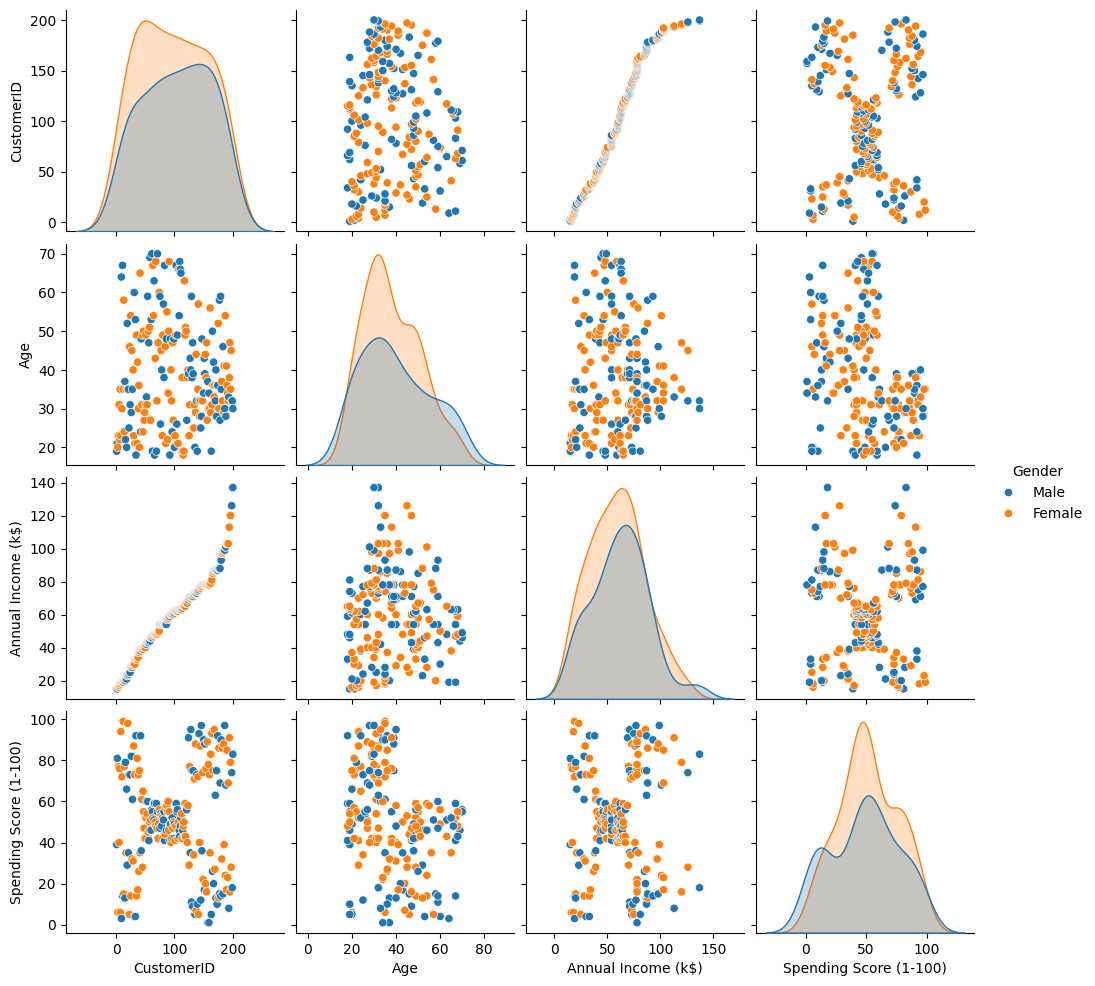

In [10]:
sns.pairplot(data,hue='Gender')

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

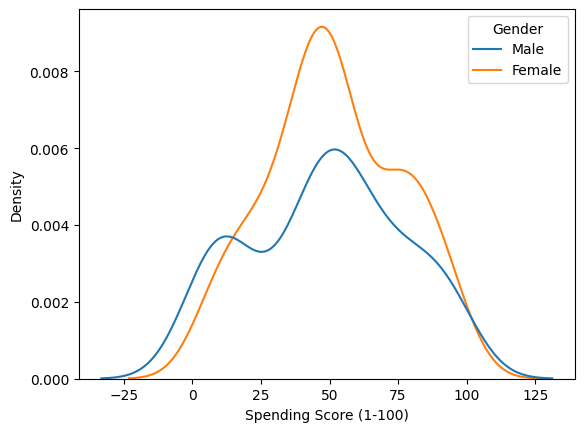

In [13]:
sns.kdeplot(data,x='Spending Score (1-100)',hue='Gender')

<Axes: xlabel='Gender'>

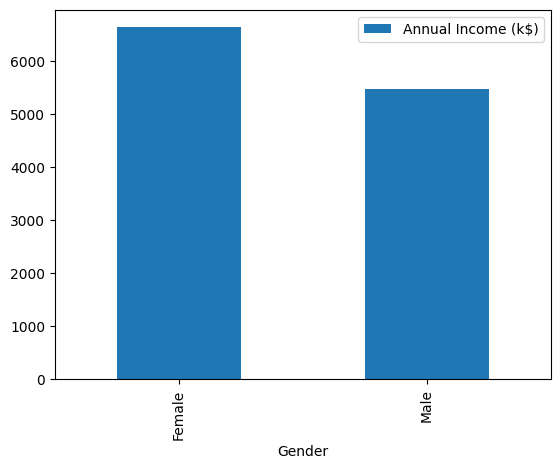

In [15]:
data.groupby("Gender").agg({"Annual Income (k$)":"sum"}).plot(kind='bar')

In [21]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<ipython-input-52-15fe1f853aad>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
<ipython-input-52-15fe1f853aad>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
<ipython-input-52-15fe1f853aad>:7: UserWarning: 

`distplot` is a deprecated function and will be re

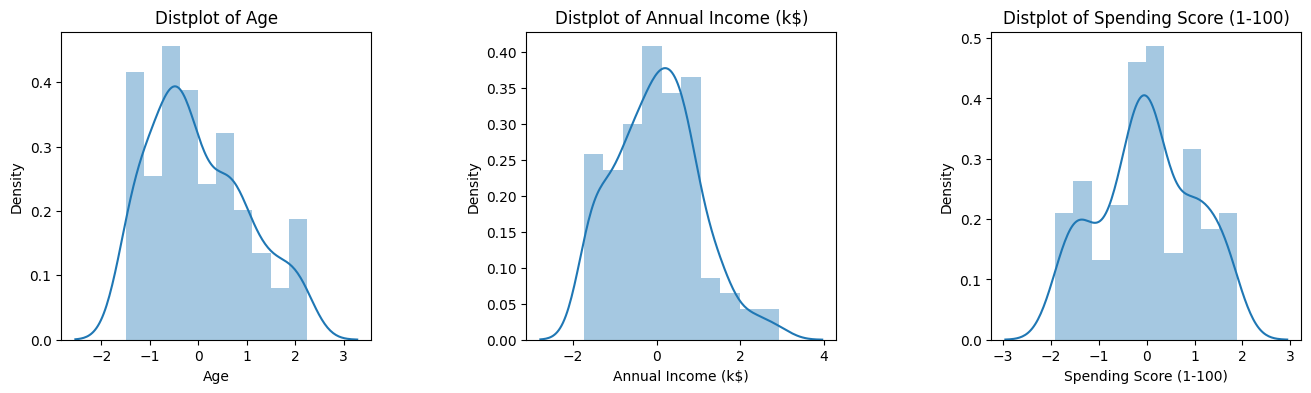

In [52]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

<Axes: xlabel='Age'>

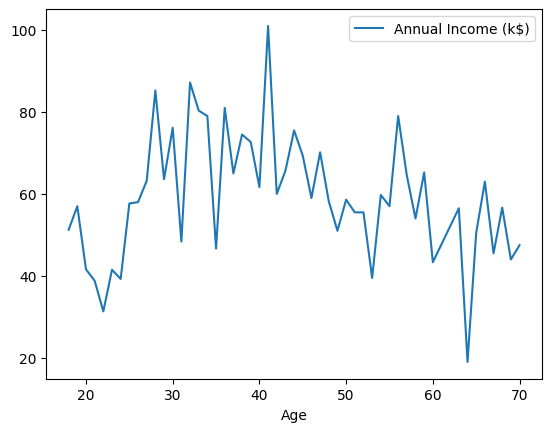

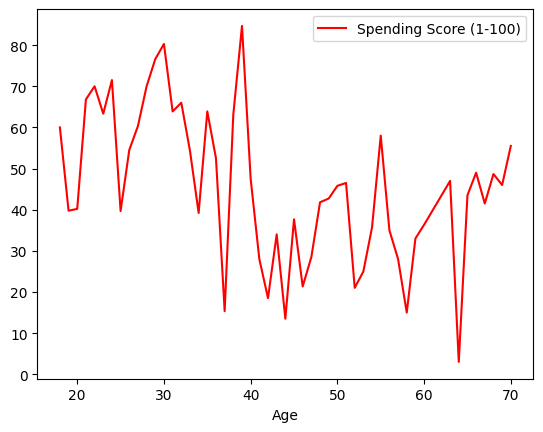

In [24]:
data.groupby('Age').agg({"Annual Income (k$)":'mean'}).plot(kind='line')
data.groupby('Age').agg({'Spending Score (1-100)':'mean'}).plot(kind='line',color='r')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and aggregate the data
grouped_data = data.groupby(['Gender', 'Age'])['Annual Income (k$)'].sum().reset_index()
grouped_data

,Gender,Age,Annual Income (k$)
0,Female,18,65
1,Female,19,128
2,Female,20,53
3,Female,21,179
4,Female,22,74
...,...,...,...
82,Male,66,63
83,Male,67,135
84,Male,68,63
85,Male,69,44


In [33]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [37]:
sc=StandardScaler()
sc_tranform=sc.fit_transform(data)

df=pd.DataFrame(sc_tranform,columns=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'])

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
inertia=[]
silhouette=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)
  silhouette.append(silhouette_score(df,kmeans.labels_))

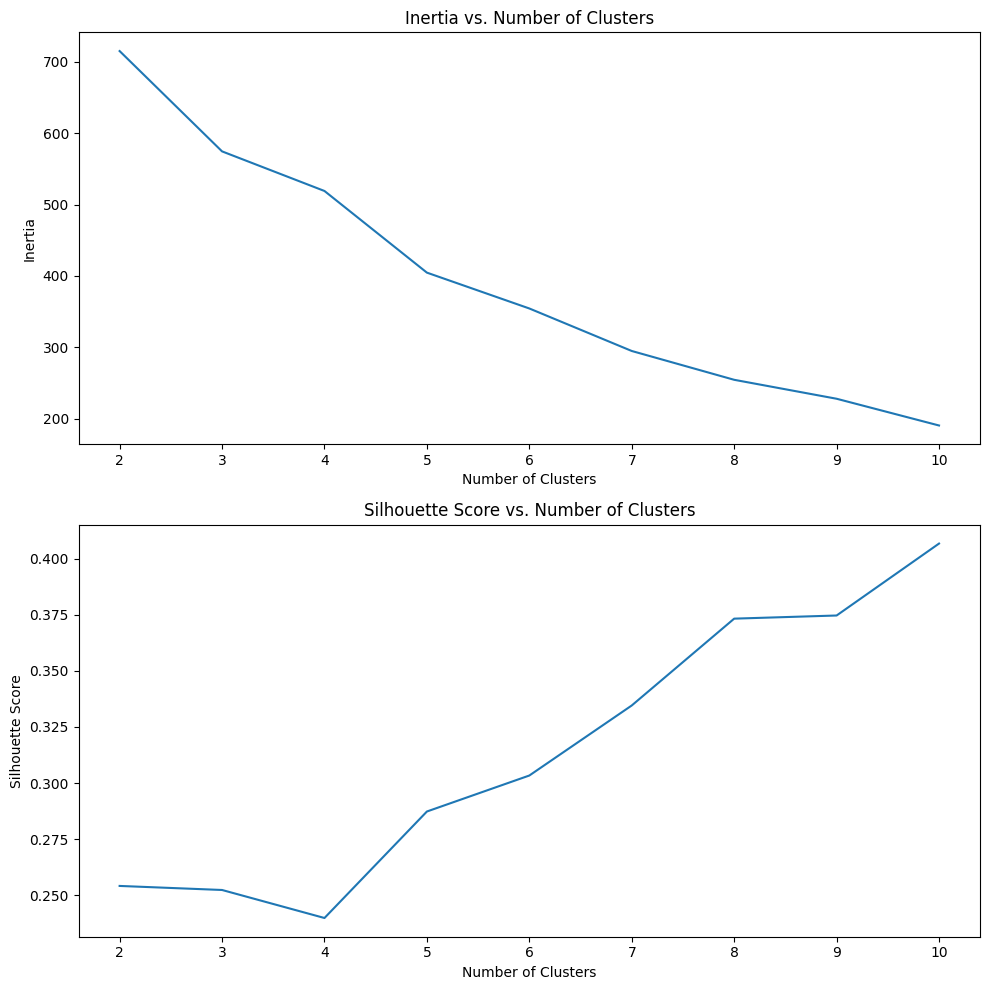

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot inertia
axes[0].plot(range(2, 11), inertia)
axes[0].set_xlabel('Number of Clusters')  # X-axis label
axes[0].set_ylabel('Inertia')  # Y-axis label
axes[0].set_title('Inertia vs. Number of Clusters')  # Subplot title

# Plot silhouette scores
axes[1].plot(range(2, 11), silhouette)
axes[1].set_xlabel('Number of Clusters')  # X-axis label
axes[1].set_ylabel('Silhouette Score')  # Y-axis label
axes[1].set_title('Silhouette Score vs. Number of Clusters')  # Subplot title

plt.tight_layout()  # Adjust layout to prevent overlapping labels

In [53]:
km = KMeans(n_clusters=5).fit(df)

In [54]:
df['label'] = km.labels_

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,1
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,1
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,1
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,1
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,1


In [56]:
df.label.value_counts()

,count
label,
0,56
1,43
2,40
4,35
3,26


In [58]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(df[df.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
       CustomerID     Gender        Age  Annual Income (k$)  \
count   56.000000  56.000000  56.000000           56.000000   
mean    -0.565398   0.048925   1.193634           -0.501901   
min     -1.584846  -0.886405   0.082532           -1.586321   
max      0.320433   1.128152   2.235532            0.245811   

       Spending Score (1-100)  
count               56.000000  
mean                -0.340521  
min                 -1.832378  
max                  0.380451  



cluster nb : 1
       CustomerID     Gender        Age  Annual Income (k$)  \
count   43.000000  43.000000  43.000000           43.000000   
mean    -1.198554  -0.136803  -0.845428           -1.160244   
min     -1.723412  -0.886405  -1.496335           -1.738999   
max     -0.372396   1.128152   0.082532           -0.250391   

       Spending Score (1-100)  
count               43.000000  
mean                 0.403925  
min                 -1.715913  
max                  1.894492  



cluster nb :